In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
import io

uploaded = files.upload()

Saving 278k_song_labelled.csv to 278k_song_labelled.csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['278k_song_labelled.csv']))

In [7]:
# df = pd.read_csv('278k_song_labelled.csv')
y = df['labels']
df.drop('labels', axis=1, inplace=True)
X = df.iloc[:, 1:] # remove the id column
X.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07


```
The labels are: {
  'sad': 0,
  'happy': 1,
  'energetic': 2,
  'calm': 3
}
```

In [8]:
from sklearn.model_selection import train_test_split

X_fulltrain, X_test, y_fulltrain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_fulltrain, y_fulltrain, test_size=0.25, random_state=42)


In [9]:
X_fulltrain.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_fulltrain.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# EDA

In [12]:
X_train.describe().round(3)

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
count,166762.000,166762.000,166762.000,166762.000,166762.000,166762.000,166762.000,166762.000,166762.000,166762.000,166762.0
mean,232586.920,0.552,0.556,-10.384,0.088,0.387,0.256,0.189,0.449,119.149,0.0
std,117052.929,0.189,0.280,6.684,0.113,0.365,0.374,0.163,0.268,30.475,0.0
min,6706.000,0.000,0.000,-60.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
25%,171933.000,0.431,0.341,-12.765,0.036,0.034,0.000,0.096,0.219,95.045,0.0
50%,213160.000,0.570,0.590,-8.414,0.047,0.263,0.001,0.121,0.433,119.936,0.0
75%,264828.750,0.693,0.792,-5.852,0.082,0.756,0.650,0.228,0.665,138.832,0.0
max,3919895.000,0.989,1.000,4.815,0.965,0.996,1.000,1.000,1.000,241.808,0.0


In [13]:
X_train.isna().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
dtype: int64

In [14]:
y.value_counts(normalize=True)

1    0.382924
0    0.295239
2    0.169336
3    0.152502
Name: labels, dtype: float64

In [ ]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='labels')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'duration (ms)'),
  Text(1, 0, 'danceability'),
  Text(2, 0, 'energy'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'speechiness'),
  Text(5, 0, 'acousticness'),
  Text(6, 0, 'instrumentalness'),
  Text(7, 0, 'liveness'),
  Text(8, 0, 'valence'),
  Text(9, 0, 'tempo'),
  Text(10, 0, 'spec_rate')])

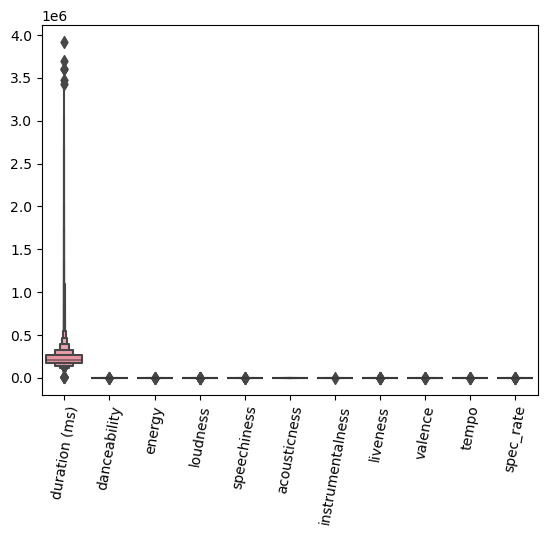

In [ ]:
sns.boxenplot(data=X_train)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'loudness'),
  Text(3, 0, 'speechiness'),
  Text(4, 0, 'acousticness'),
  Text(5, 0, 'instrumentalness'),
  Text(6, 0, 'liveness'),
  Text(7, 0, 'valence'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'spec_rate')])

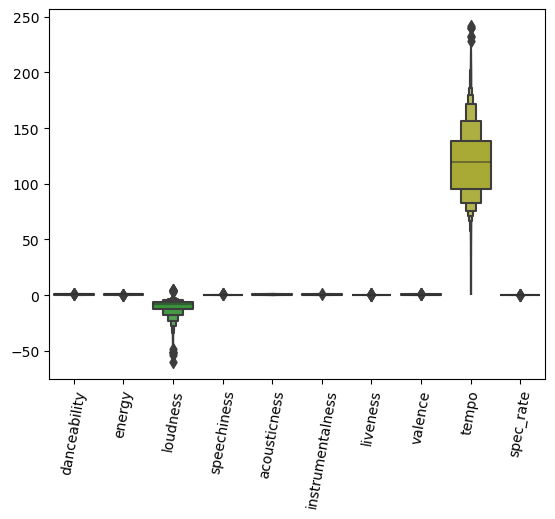

In [ ]:
sns.boxenplot(data=X_train.drop(['duration (ms)'], axis=1))
plt.xticks(rotation=80)

<AxesSubplot:>

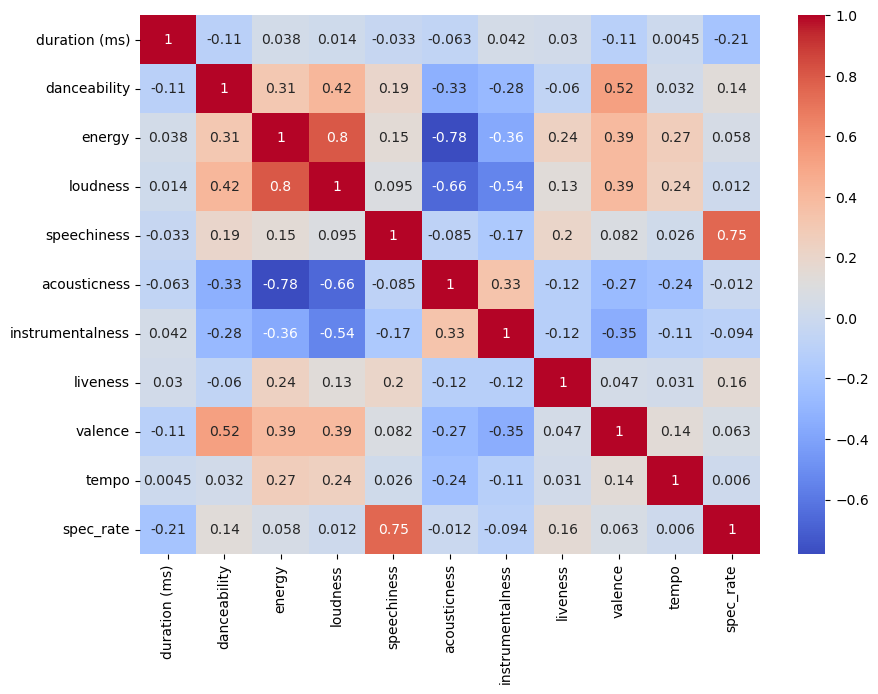

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [ ]:
f_imp = mutual_info_classif(X_train, y_train)

col_imp = zip(X_train.columns, f_imp)
col_imp = sorted(col_imp, key=lambda x: x[1], reverse=True)

print('Feature Importance (acc. to Mutual Information)')
for i in col_imp:
  print(f'{i[0]:17s} -> {i[1]:.3f}')

Feature Importance (acc. to Mutual Information)
energy            -> 0.548
acousticness      -> 0.484
loudness          -> 0.418
instrumentalness  -> 0.320
danceability      -> 0.208
valence           -> 0.172
speechiness       -> 0.134
tempo             -> 0.117
spec_rate         -> 0.096
duration (ms)     -> 0.067
liveness          -> 0.062


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

r = permutation_importance(dt, X_val, y_val,
                           n_repeats=30,
                           random_state=42)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<18}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

energy            0.220 +/- 0.001
instrumentalness  0.208 +/- 0.002
acousticness      0.146 +/- 0.001
danceability      0.099 +/- 0.001
speechiness       0.053 +/- 0.001
loudness          0.043 +/- 0.000
valence           0.043 +/- 0.001
duration (ms)     0.030 +/- 0.001
tempo             0.012 +/- 0.001
liveness          0.003 +/- 0.000
spec_rate         0.001 +/- 0.000


In [10]:
features_selected = X_train.columns.drop(['duration (ms)', 'spec_rate', 'tempo', 'liveness'])

# Model Training

In [11]:
X_fulltrain = X_fulltrain[features_selected]
X_train = X_train[features_selected]
X_val = X_val[features_selected]
X_test = X_test[features_selected]

In [14]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
f1_score(y_val, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     16411
           1       0.81      0.85      0.83     21380
           2       0.80      0.77      0.78      9490
           3       0.92      0.93      0.93      8307

    accuracy                           0.83     55588
   macro avg       0.84      0.84      0.84     55588
weighted avg       0.83      0.83      0.83     55588

[[13217  2089   515   590]
 [ 1906 18108  1306    60]
 [  127  2066  7275    22]
 [  545    32     2  7728]]


0.8331265209996397

In [16]:
scores = []
rng = range(100, 1001, 100)
for i in rng:
  lr = LogisticRegression(max_iter=i, random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_val)
  score = f1_score(y_val, y_pred, average='weighted')
  scores.append(score)

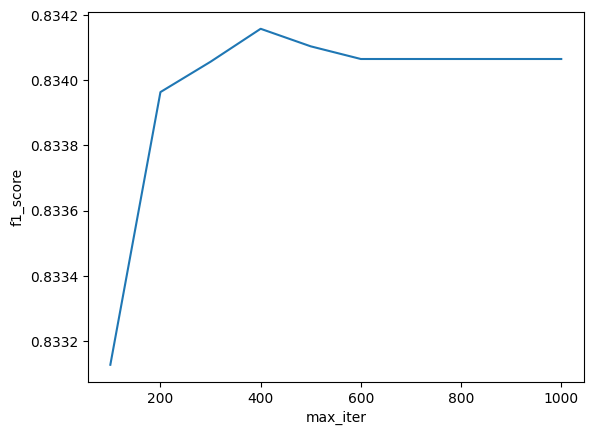

400


In [18]:
plt.plot(rng, scores)
plt.xlabel('max_iter')
plt.ylabel('f1_score')
plt.show()
print(rng[np.argmax(scores)])

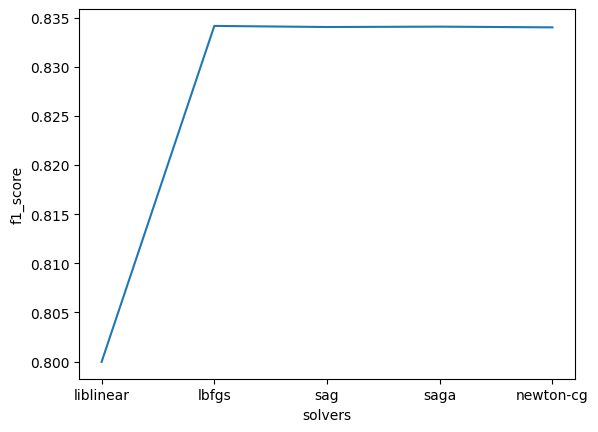

lbfgs


In [19]:
scores = []
rng = ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
for s in rng:
  lr = LogisticRegression(solver=s, max_iter=400, random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_val)
  score = f1_score(y_val, y_pred, average='weighted')
  scores.append(score)
plt.plot(rng, scores)
plt.xlabel('solvers')
plt.ylabel('f1_score')
plt.show()
print(rng[np.argmax(scores)])

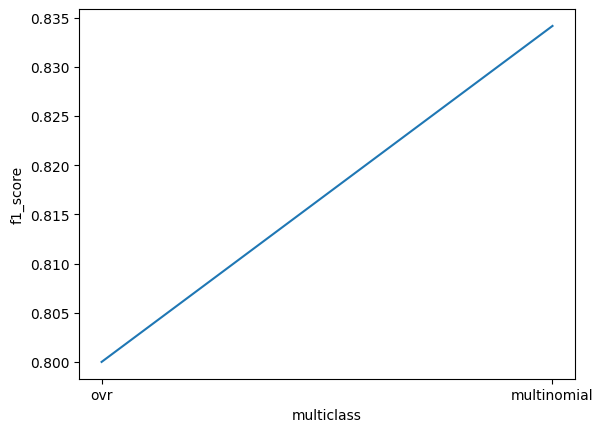

multinomial


In [23]:
scores = []
rng = ['ovr', 'multinomial']
for m in rng:
  lr = LogisticRegression(multi_class=m, solver='lbfgs', max_iter=400, random_state=42)
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_val)
  score = f1_score(y_val, y_pred, average='weighted')
  scores.append(score)
plt.plot(rng, scores)
plt.xlabel('multiclass')
plt.ylabel('f1_score')
plt.show()
print(rng[np.argmax(scores)])

In [22]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=400, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
f1_score(y_val, y_pred, average='weighted')

0.8341578644331702

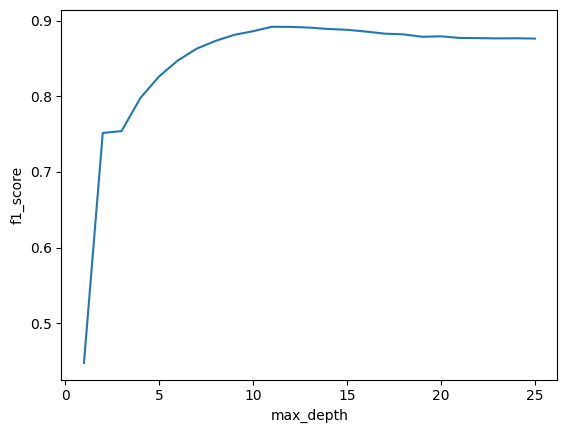

11 0.8918211327422123


In [44]:
scores = []
rng = range(1, 26, 1)
for d in rng:
  dt = DecisionTreeClassifier(max_depth=d, random_state=42)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_val)
  score = f1_score(y_val, y_pred, average='weighted')
  scores.append(score)
plt.plot(rng, scores)
plt.xlabel('max_depth')
plt.ylabel('f1_score')
plt.show()
print(rng[np.argmax(scores)], np.max(scores))

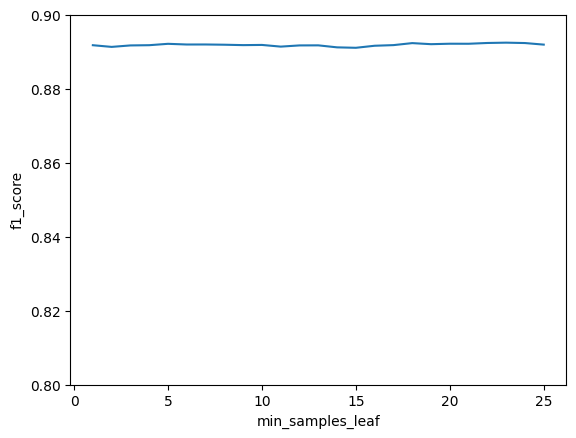

23


In [42]:
scores = []
rng = range(1, 26, 1)
for s in rng:
  dt = DecisionTreeClassifier(min_samples_leaf=s, max_depth=11, random_state=42)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_val)
  score = f1_score(y_val, y_pred, average='weighted')
  scores.append(score)
plt.plot(rng, scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('f1_score')
plt.ylim((0.8, 0.9))
plt.show()
print(rng[np.argmax(scores)])

In [43]:
np.max(scores)

0.8925118274009373

In [48]:
dt = DecisionTreeClassifier(min_samples_leaf=23, max_depth=11, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
f1_score(y_val, y_pred, average='weighted')

0.8925118274009373